In [6]:
# Tokenize the data at the wrod level

In [43]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [44]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from nltk.text import Text
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
nltk.download('punkt')

# Load the text
file_path = (r"E:\Assignments\Advance\Assignment\federalist.txt")
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Tokenize the text into words
tokens = word_tokenize(text)
tokens[0:11]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mskam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'The',
 'Federalist',
 'Papers',
 ',',
 'by',
 'Alexander']

In [45]:
#Find Polarity Scores of Unprocessed data

In [47]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mskam\AppData\Roaming\nltk_data...


True

In [48]:
# Initialize sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Calculate polarity scores
unprocessed_scores = sid.polarity_scores(text)
unprocessed_scores

{'neg': 0.074, 'neu': 0.795, 'pos': 0.131, 'compound': 1.0}

In [ ]:
#Processing the data


In [50]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mskam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [51]:
#Removing stopword and converting to lowercase
stop_words = set(stopwords.words('english'))

# Process tokens
processed_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
processed_tokens[:10] 

['project',
 'gutenberg',
 'ebook',
 'federalist',
 'papers',
 'alexander',
 'hamilton',
 'john',
 'jay',
 'james']

In [53]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mskam\AppData\Roaming\nltk_data...


True

In [54]:
#Performing stemming and lemmatization
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed_tokens = [stemmer.stem(word) for word in processed_tokens]

lemmatized_tokens = [lemmatizer.lemmatize(word) for word in processed_tokens]

stemmed_tokens[:10], lemmatized_tokens[:10]

(['project',
  'gutenberg',
  'ebook',
  'federalist',
  'paper',
  'alexand',
  'hamilton',
  'john',
  'jay',
  'jame'],
 ['project',
  'gutenberg',
  'ebook',
  'federalist',
  'paper',
  'alexander',
  'hamilton',
  'john',
  'jay',
  'james'])

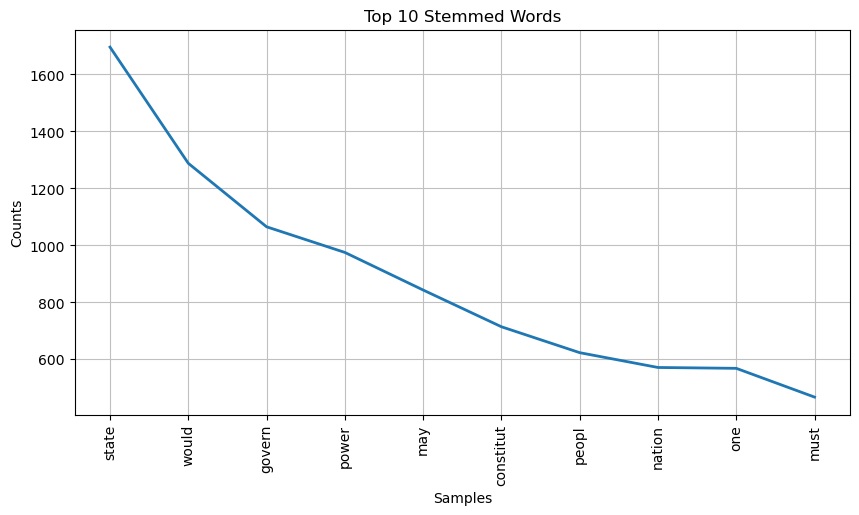

In [56]:
#Visulizing the top 10 most common words

# Frequency distribution (Stemmed words)
fdist_stemmed = FreqDist(stemmed_tokens)
top_10_stemmed = fdist_stemmed.most_common(10)

# Plot top 10 most common stemmed words
plt.figure(figsize=(10, 5))
fdist_stemmed.plot(10, title="Top 10 Stemmed Words")
plt.show()

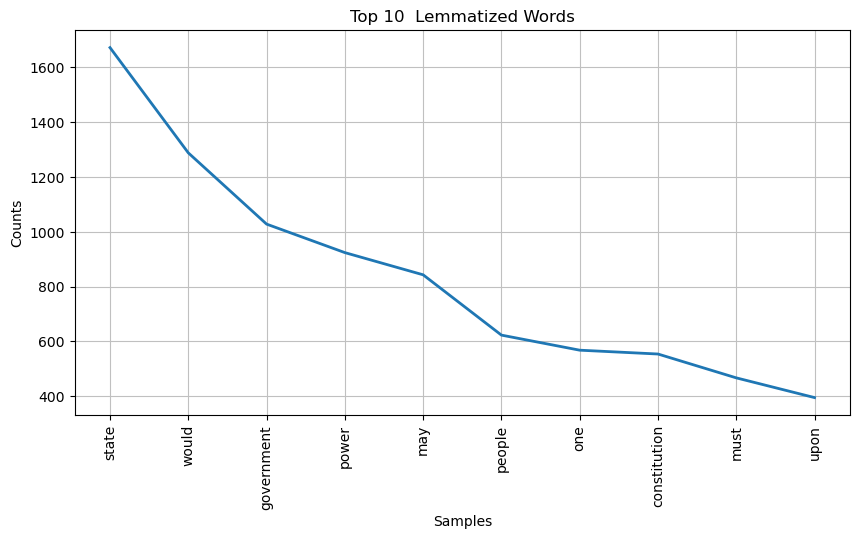

In [57]:
#Frequency Distribution(Lemmatized Tokens)
fdist_lemmatized = FreqDist(lemmatized_tokens)
top_10_lemmatized = fdist_lemmatized.most_common(10)

# Plot top 10 most common lemmatized words
plt.figure(figsize=(10, 5))
fdist_lemmatized.plot(10, title="Top 10  Lemmatized Words")
plt.show()

In [ ]:
#Polarity Scores of processed data


In [58]:
# Convert processed, stemmed, and lemmatized tokens back to string
processed_text = ' '.join(processed_tokens)
stemmed_text = ' '.join(stemmed_tokens)
lemmatized_text = ' '.join(lemmatized_tokens)

# Calculate polarity scores
processed_scores = sid.polarity_scores(processed_text)
stemmed_scores = sid.polarity_scores(stemmed_text)
lemmatized_scores = sid.polarity_scores(lemmatized_text)

processed_scores, stemmed_scores, lemmatized_scores

({'neg': 0.102, 'neu': 0.694, 'pos': 0.204, 'compound': 1.0},
 {'neg': 0.067, 'neu': 0.797, 'pos': 0.136, 'compound': 1.0},
 {'neg': 0.106, 'neu': 0.686, 'pos': 0.209, 'compound': 1.0})

<Figure size 1000x500 with 0 Axes>

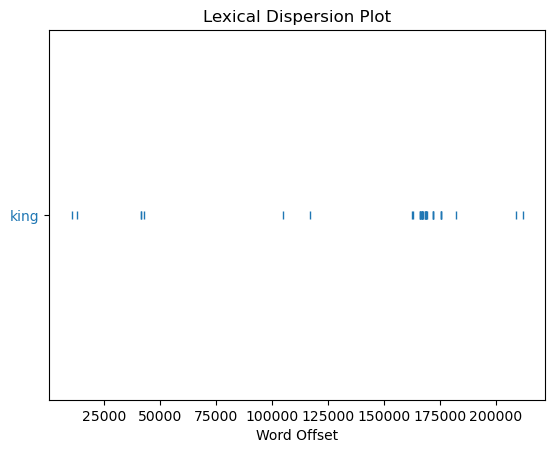

In [59]:
#Derive both a concordance and a dispersion plopt of word "king"
text_object = Text(tokens)

# Generate concordance for the word 'king'
concordance_list = text_object.concordance_list('king', lines=10)
concordance_list

# Generate dispersion plot for the word 'king'
plt.figure(figsize=(10, 5))
text_object.dispersion_plot(['king'])